In [1]:
!pip install tomotopy

In [2]:
!pip install pyLDAvis==3.3.1

In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import tomotopy as tp
import sys

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
hotel1 = pd.read_csv('/content/drive/MyDrive/공모전/tmp/hotel_review1.csv')

In [6]:
hotel2 = pd.read_csv('/content/drive/MyDrive/공모전/tmp/hotel_review2.csv', header=None)

In [7]:
hotel3 = pd.read_csv('/content/drive/MyDrive/공모전/tmp/hotel_review_final.csv')

In [8]:
hotel4 = pd.read_csv('/content/drive/MyDrive/공모전/tmp/lottehotel.csv')

In [9]:
hotel5= pd.read_csv('/content/drive/MyDrive/공모전/tmp/ramada_review (2) (1).csv', encoding='cp949')

In [10]:
hotel6 = pd.read_csv('/content/drive/MyDrive/공모전/tmp/test_set_final.csv')

In [11]:
del hotel1['Unnamed: 0']
del hotel2[0]
del hotel3['Unnamed: 0']
del hotel4['Unnamed: 0']
del hotel4['Unnamed: 0.1']
del hotel5['Unnamed: 0']

In [12]:
del hotel1['label1']

In [13]:
del hotel6['Unnamed: 0']

In [14]:
hotel2.columns = hotel1.columns

In [15]:
data = pd.concat([hotel1, hotel2, hotel3, hotel4, hotel5, hotel6], axis=0)

In [16]:
data = data[['nickname', 'score', 'review', 'stay_date']]

In [17]:
review_list = list(data.review)
review_list

['노보텔 동대문 신규 오픈시점에 숙박하게됐습니다 침구도 푹신하고 침대마다 USB port 전원 제공에 사이좋게 스마트폰 충천했습니다 호텔방을 들어가니 나가기가 싫네요 Food exchange에서 제공하는 아침 뷔페는 먹는거마다 맛있네요 정성스런 착즙쥬스 맛있는 카푸치노와 베이커리로 행복한 아침이었습니다 신규 오픈이어서 준비로 바쁘지만 친철한 직원들의 답변과 안내에 서울 시내 호캉스로 강추합니다 DDP 외에도 현대 아웃렛 센터도 있어서 오랜만에 쇼핑도 즐거운 경험이었습니다',
 '이그제큐티브 룸 예약해서 라운지 이용했습니다 라운지 음식은 그렇게 좋은 퀄리티는 아니었습니다 손님이 많지 않아서인지 가짓수도 많지 않았습니다 조식 또한 좀 더 맛이나 모양에 신경 써주시면 좋을 것 같습니다 요거트를 큰 통에 담아서 덜어 먹을 수 있도록 되어 있는데 작은 병에 세심하게 담아 주셨으면 더 청결해보이고 좋았을 것 같습니다 수영장 바닥이 너무 미끌거리고 약 냄새가 조금 나긴 했지만 너무 북적이지는 않아 좋았습니다',
 '지난 6월 30일 와이프의 강력한 요청으로 작년에 갔던 그랜드머큐어를 다시 가려고 했다가 가 본 곳이 아닌 새로운 곳이 가고 싶어 붙어 있는 노보텔 스위트를 방문했습니다 3시 30분 즈음에 로비에서 체크인 진행하였는데 대기는 좀 있는 편이었지만 아코르 회원이라 상대적으로 대기 없이 바로 진행할 수 있었습니다 저희가 질문이 좀 많은 편이었는데 체크인 진행해주셨던 호텔리어 분께서 성함을 못 여쭤봤네요 너무나 친절하게 알려주셔서 참 감사했습니다 저희가 배정받았던 룸은 디럭스스위트였고 사전에 요청했었던 공기청정기와 가습기를 미리 준비해주셨습니다 방은 침실과 화장실 거실주방이 분리되어 있었으며 각 공간을 미닫이문으로 격리시킬 수 있었습니다 그랜드 머큐어에서도 느꼈었지만 둘이 있기에는 많이 넓은 편이며 왜 아이들을 2명까지 허용할 수 있는지를 알 수 있는 대목이기도 했습니다 저희는 52번대 방을 배정받았었는데 체크인시 정겹게 설명해주신 것처럼 한강이 살짝 보이는 뷰입니다

In [18]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 86 kB 4.8 MB/s 
     |████████████████████████████████| 448 kB 60.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [19]:
from konlpy.tag import Okt
t = Okt()

In [20]:
dataset = []
for i in range(len(review_list)):
    dataset.append(t.nouns(review_list[i]))

In [21]:
dataset

[['노보텔',
  '동대문',
  '신규',
  '오픈',
  '시점',
  '숙박',
  '침구',
  '침대',
  '전원',
  '제공',
  '스마트폰',
  '충천',
  '호텔',
  '방',
  '제공',
  '아침',
  '뷔페',
  '착즙',
  '쥬스',
  '카푸치노',
  '베이커리',
  '아침',
  '신규',
  '오픈',
  '준비',
  '친철',
  '직원',
  '답변',
  '안내',
  '서울',
  '시내',
  '호캉스',
  '강',
  '외',
  '현대',
  '아웃렛',
  '센터',
  '만',
  '쇼핑',
  '경험'],
 ['큐티브',
  '룸',
  '예약',
  '라운지',
  '이용',
  '라운지',
  '음식',
  '퀄리티',
  '손님',
  '인지',
  '가짓수',
  '조식',
  '또한',
  '좀',
  '더',
  '맛',
  '모양',
  '신경',
  '것',
  '요거트',
  '통',
  '수',
  '병',
  '세심',
  '더',
  '청결',
  '것',
  '수영장',
  '바닥',
  '약',
  '냄새',
  '조금',
  '북적'],
 ['지난',
  '와이프',
  '요청',
  '작년',
  '그랜드',
  '머',
  '큐어',
  '다시',
  '곳',
  '곳',
  '노보텔',
  '스위트',
  '방문',
  '즈음',
  '로비',
  '체크',
  '진행',
  '대기',
  '좀',
  '아코르',
  '회원',
  '상대',
  '대기',
  '바로',
  '진행',
  '수',
  '저희',
  '질문',
  '좀',
  '체크',
  '진행',
  '호텔리어',
  '분',
  '성함',
  '못',
  '저희',
  '배정',
  '룸',
  '디럭스',
  '스',
  '위트',
  '사전',
  '요청',
  '공기청정기',
  '가습기',
  '미리',
  '준비',
  '방',
  '침실',
  '화장실',
  '거실',
  

In [22]:
stopwords = ['천안', '동탄', '구로', '광화문', '해운대', '제주', 
             '마포', '삼성', '서초', '서대문', '울산', '역삼','동대문',
             '대전', '명동', '김포', '부산', '용산', '남대문', '서울', 
             '군산', '수원', '신도림', '여수', '평창', '속초', 
             '만족', '편안', '불편', '가족', '친구', '부모님', '여자친구', 
             '남자친구', '연인', '아이', '와이프', 
             '신라', '스테이', '신라스테이', '친절',
             '노보텔','라마다', '롯데시티', '롯데', '시티', 
             '동', '추천', '강추', '최악', '인사동' '익선동', 
             '아베', '여행', '다음', '방문', '생각',
             '이용', '만족', '추천', '라마다의', '라마', '다의', '정도',
             '프라자', '때문', '공항', '그랜드', '앰버서더', '스위트', 
             '숙소', '전반적', '서울', '동문시장', '동문', '최고', '친구', '직원', 
             '감사', '필요', '이번', '하루', '강추', '컨디션', '숙박', '일반적', 
             '우리', '투숙', '정말', '바로', '다시', '시간', '조금', '객실','모두', '아주',
             '정말', '최고', '완전', '아이', '다만', '월드', '기분', '감동', '기억', '한번', '모든', '덕분', 
             '아기', '진짜', '출장', '호캉스', '매우', '안심', '아내', '신랑', '요즘', '항상', '걱정', '마음', '처음','그냥', '사람', '하나', '저희',
             '자주', '역시', '다른', '생일', '선택', '사용', '휴가', '여름', '엄마','리뷰', '아들', '키즈', '위해', '또한', '미리','추억', '해주시',
             '여의도', '글래드', '메리어트', '신화', '큐티브', '하얏트', '방도', '제주도', '전반', '힐튼', '동안', '보고', '대비', '남산', '부분', '타워', '도착',
             '방이', '무엇', '코로나', '끼리', '여기', '연휴', '동생', '기념일', '웨스턴','한국', '가장', '광안대교', '예약', '수준', '제공', '추가', '레지던스',
             '남편', '월드', '달라', '르살롱', '대한', '대해','어머니', '아버지', '체크아웃' ,
             '별로', '주말', '포함', '가지', '제일', '기대', '배정', '기회', '의사', '느낌', '제대로', '데리', '일찍'
          ]

In [26]:
for i in range(len(dataset)):
    datas= dataset[i]
    print(datas)
    for word in datas:
        if word in stopwords:
            print(word)
            dataset[i].remove(word)

#5번실행

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
['초', '클럽', '라운지', '습니', '층', '로비', '점심', '저녁', '아침', '수', '클럽', '라운지', '것', '스카이', '가기', '잠실', '일대', '데이트', '것', '때', '맞이', '방', '번호', '사진', '클럽', '라운지', '레몬', '사진']
['식사', '장소', '세느', '김', '호텔', '갑자기', '비용', '캐릭터', '룸', '조카', '그', '안', '캐릭터', '가방', '선물', '나하', '습보', '세느', '식사', '사실', '그', '가격', '랍스터', '또']
['한지', '약', '호텔', '때', '클럽룸', '주로', '라운지', '분', '주변', '지인']
['때', '겸', '호텔', '점', '점', '번', '드네', '위치', '절약', '마지막', '날', '전', '층', '피트니스클럽', '사우나', '헬스장', '운동화', '운동복', '대여', '번', '또', '점']
['행사', '관련', '분실물', '퇴', '문의', '때', '깜짝', '시설', '좀', '명성', '재', '백프로']
['달', '결혼', '기념', '브라', '덜', '샤워', '엑스트라', '베드', '사전', '요청', '어', '매니', '티', '팅']
['사계절', '때', '로비', '조식', '라운지', '등등', '최상', '날때', '침대', '곳', '뽀송', '뽀송']
['쉬', '목적', '주변', '백화점', '쇼핑몰', '가까이', '짐', '보관', '체크', '인전', '태풍', '지하', '마트', '갈수', '조식', '수영장', '재']
['호텔', '라운지', '브런치', '뷔페', '컨셉', '라운지', '뷔페', '구경', '대화', '음식', '브런치', '핫', '푸드', '샌드위치', '종류', '재미', '제', '즉석', '와플', '전날', '술', '도가

In [28]:
# 한글자 제거
high_score_reviews = dataset
high_score_reviews = [[y for y in x if not len(y)==1]
           for x in dataset]
high_score_reviews

[['신규',
  '오픈',
  '시점',
  '침구',
  '침대',
  '전원',
  '스마트폰',
  '충천',
  '호텔',
  '아침',
  '뷔페',
  '착즙',
  '쥬스',
  '카푸치노',
  '베이커리',
  '아침',
  '신규',
  '오픈',
  '준비',
  '친철',
  '답변',
  '안내',
  '시내',
  '현대',
  '아웃렛',
  '센터',
  '쇼핑',
  '경험'],
 ['라운지',
  '라운지',
  '음식',
  '퀄리티',
  '손님',
  '인지',
  '가짓수',
  '조식',
  '모양',
  '신경',
  '요거트',
  '세심',
  '청결',
  '수영장',
  '바닥',
  '냄새',
  '북적'],
 ['지난',
  '요청',
  '작년',
  '큐어',
  '즈음',
  '로비',
  '체크',
  '진행',
  '대기',
  '아코르',
  '회원',
  '상대',
  '대기',
  '진행',
  '질문',
  '체크',
  '진행',
  '호텔리어',
  '성함',
  '디럭스',
  '위트',
  '사전',
  '요청',
  '공기청정기',
  '가습기',
  '준비',
  '침실',
  '화장실',
  '거실',
  '주방',
  '분리',
  '공간',
  '미닫이문',
  '격리',
  '큐어',
  '편이',
  '허용',
  '대목',
  '체크',
  '인시',
  '설명',
  '한강',
  '살짝',
  '리버',
  '운치',
  '지적',
  '방음',
  '살짝',
  '복도',
  '통화',
  '거실',
  '대화',
  '내용',
  '잠시',
  '해피아워',
  '라운지',
  '식사',
  '디져트',
  '준비',
  '케이크',
  '압도',
  '먹기',
  '케이크',
  '주제',
  '얼마나',
  '분명',
  '음식',
  '사진',
  '머릿속',
  '케이크',
  '연어',
  '레몬',
  '타르',
  '타르소스',
  '케이퍼',
  

In [29]:
print(len(high_score_reviews))
for review in high_score_reviews:
    if len(review) == 0:
        high_score_reviews.remove(review)
print(len(high_score_reviews))

17012
16943


In [30]:
!pip install gensim

In [31]:
import random
import os
seed=9999
random.seed(seed)
np.random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)

In [32]:
from gensim import corpora, models
import gensim

dictionary = corpora.Dictionary(high_score_reviews)
corpus=[dictionary.doc2bow(text) for text in high_score_reviews]

In [33]:
from gensim.models import CoherenceModel

coherence_values = []
for i in range(2,15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts = high_score_reviews, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

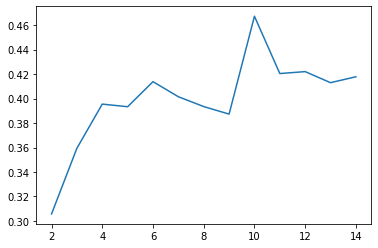

In [34]:
x=range(2,15)
plt.plot(x, coherence_values)
plt.show()

In [35]:
perplexity_values=[]
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

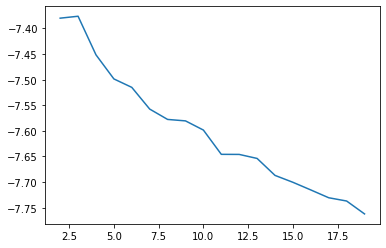

In [36]:
x = range(2,20)
plt.plot(x, perplexity_values)
plt.show()

In [37]:
mdl = tp.LDAModel(tw=tp.TermWeight.ONE, min_cf=6, rm_top=6, k=10, seed=seed)
for review in high_score_reviews:
    mdl.add_doc(review)
mdl.burn_in = 1000
mdl.train(0)
print('Num docs:', len(mdl.docs), ', Vocab size:', len(mdl.used_vocabs), ', Num words:', mdl.num_words)
print('Removed top words:', mdl.removed_top_words)
print('Training...', file=sys.stderr, flush=True)

for i in range(0, 1500, 10):
    mdl.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))

mdl.summary()


for k in range(mdl.k):
    print('Topic #{}'.format(k))
    for word, prob in mdl.get_topic_words(k):
        print('\t', word, prob, sep='\t')

Training...


Num docs: 16943 , Vocab size: 3332 , Num words: 162292
Removed top words: ['호텔', '체크', '시설', '서비스', '위치', '조식']
Iteration: 0	Log-likelihood: -8.277369199748035
Iteration: 10	Log-likelihood: -7.997078434451491
Iteration: 20	Log-likelihood: -7.870993757298314
Iteration: 30	Log-likelihood: -7.7892309189866715
Iteration: 40	Log-likelihood: -7.737818480948273
Iteration: 50	Log-likelihood: -7.700398964625456
Iteration: 60	Log-likelihood: -7.671703883473081
Iteration: 70	Log-likelihood: -7.651341722096067
Iteration: 80	Log-likelihood: -7.633837976154205
Iteration: 90	Log-likelihood: -7.621888860728499
Iteration: 100	Log-likelihood: -7.604644650186788
Iteration: 110	Log-likelihood: -7.593235434415739
Iteration: 120	Log-likelihood: -7.585462832518885
Iteration: 130	Log-likelihood: -7.57236286871308
Iteration: 140	Log-likelihood: -7.569843026725864
Iteration: 150	Log-likelihood: -7.562970422866637
Iteration: 160	Log-likelihood: -7.5586973269816715
Iteration: 170	Log-likelihood: -7.55579133711567

In [38]:
import pyLDAvis

topic_term_dists = np.stack([mdl.get_topic_word_dist(k) for k in range(mdl.k)])
doc_topic_dists = np.stack([doc.get_topic_dist() for doc in mdl.docs])
# doc_topic_dists = doc_topic_dists.sum(axis=1, keepdims=True)
doc_lengths = np.array([len(doc.words) for doc in mdl.docs])
vocab = list(mdl.used_vocabs)
term_frequency = mdl.used_vocab_freq

prepared_data = pyLDAvis.prepare(
    topic_term_dists, 
    doc_topic_dists, 
    doc_lengths, 
    vocab, 
    term_frequency,
    start_index=0, # tomotopy starts topic ids with 0, pyLDAvis with 1
    sort_topics=False # IMPORTANT: otherwise the topic_ids between pyLDAvis and tomotopy are not matching!
)
pyLDAvis.display(prepared_data)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:169: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not 

In [ ]:
print('Saving...', file=sys.stderr, flush=True)
save_path = '/content/drive/MyDrive/공모전/tmp/model1'
mdl.save(save_path, True)

## infer

In [ ]:
mdl = tp.LDAModel.load(save_path)

In [ ]:
hotel6

In [ ]:
data = hotel6

In [ ]:
review_list = list(data.review)
review_list

In [ ]:
len(review_list)

In [ ]:
from konlpy.tag import Okt
t = Okt()

In [ ]:
dataset = []
for i in range(len(review_list)):
    dataset.append(t.nouns(review_list[i]))

In [ ]:
len(dataset)

In [ ]:
stopwords = ['천안', '동탄', '구로', '광화문', '해운대', '제주', 
             '마포', '삼성', '서초', '서대문', '울산', '역삼','동대문',
             '대전', '명동', '김포', '부산', '용산', '남대문', '서울', 
             '군산', '수원', '신도림', '여수', '평창', '속초', 
             '만족', '편안', '불편', '가족', '친구', '부모님', '여자친구', 
             '남자친구', '연인', '아이', '와이프', 
             '신라', '스테이', '신라스테이', '친절',
             '노보텔','라마다', '롯데시티', '롯데', '시티', 
             '동', '추천', '강추', '최악', '인사동' '익선동', 
             '아베', '여행', '다음', '방문', '생각',
             '이용', '만족', '추천', '라마다의', '라마', '다의', '정도',
             '프라자', '때문', '공항', '그랜드', '앰버서더', '스위트', 
             '숙소', '전반적', '서울', '동문시장', '동문', '최고', '친구', '직원', 
             '감사', '필요', '이번', '하루', '강추', '컨디션', '숙박', '일반적', 
             '우리', '투숙', '정말', '바로', '다시', '시간', '조금', '객실','모두', '아주',
             '정말', '최고', '완전', '아이', '다만', '월드', '기분', '감동', '기억', '한번', '모든', '덕분', 
             '아기', '진짜', '출장', '호캉스', '매우', '안심', '아내', '신랑', '요즘', '항상', '걱정', '마음', '처음','그냥', '사람', '하나', '저희',
             '자주', '역시', '다른', '생일', '선택', '사용', '휴가', '여름', '엄마','리뷰', '아들', '키즈', '위해', '또한', '미리','추억', '해주시',
             '여의도', '글래드', '메리어트', '신화', '큐티브', '하얏트', '방도', '제주도', '전반', '힐튼', '동안', '보고', '대비', '남산', '부분', '타워', '도착',
             '방이', '무엇', '코로나', '끼리', '여기', '연휴', '동생', '기념일', '웨스턴','한국', '가장', '광안대교', '예약', '수준', '제공', '추가', '레지던스',
             '남편', '월드', '달라', '르살롱', '대한', '대해','어머니', '아버지', '체크아웃' ,
             '별로', '주말', '포함', '가지', '제일', '기대', '배정', '기회', '의사', '느낌', '제대로', '데리', '일찍'
          ]

In [ ]:
for i in range(len(dataset)):
    datas= dataset[i]
    print(datas)
    for word in datas:
        if word in stopwords:
            print(word)
            dataset[i].remove(word)

#5번실행

In [ ]:
for word in dataset[100]:
    if word in stopwords:
        dataset[100].remove(word)

In [ ]:
dataset[1558]

In [ ]:
# 한글자 제거
high_score_reviews = dataset
high_score_reviews = [[y for y in x if not len(y)==1]
           for x in dataset]
high_score_reviews

In [ ]:
print(len(high_score_reviews))
for review in high_score_reviews:
    if len(review) == 0:
        high_score_reviews.remove(review)
print(len(high_score_reviews))

In [ ]:
docs = []
for words in high_score_reviews:
    docs.append(mdl.make_doc(words))

In [ ]:
len(docs)

In [ ]:
datasettt = pd.read_csv('/content/drive/MyDrive/공모전/tmp/sentimental_score_kobert.csv', encoding='cp949')

In [ ]:
del datasettt['Unnamed: 0']

In [ ]:
datasettt['topic_score'] = mdl.infer(docs)[0]

In [ ]:
import ast

datasettt['sentimental_score'] = datasettt.sentimental_score.apply(lambda x: ast.literal_eval(x))

In [ ]:
np.array(datasettt['topic_score'][0]).reshape(10,-1) @ np.array(datasettt['sentimental_score'][0])

In [ ]:
datasettt['sentimental_per_topic'] = 0
for i in range(len(datasettt)):
    datasettt['sentimental_per_topic'][i] = (np.array(datasettt['topic_score'][i]).reshape(10,-1) @ np.array(datasettt['sentimental_score'][i])).tolist() 

In [ ]:
datasettt['sentimental_per_topic'][0]

In [ ]:
datasettt.to_csv('/content/drive/MyDrive/공모전/tmp/sentimental_per_topic.csv', encoding='euc-kr')